<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import panel as pn
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc 
from sklearn.metrics import classification_report
pn.extension('plotly')

def edad(x):
    tmp = dt.datetime.today()-x
    return tmp.days/365

In [3]:
# Código
data = pd.read_csv('SB11_20202.txt', sep="¬", engine='python')

data.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,03/07/2003,20204,SB11202040001656,ESTUDIANTE,COLOMBIA,No,CALDAS,...,48.0,61,A1,261,61,61.340840,3.0,3.0,PUBLICAR,NO
1,TI,COLOMBIA,F,16/06/2003,20204,SB11202040001763,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,58.0,85,A2,306,87,71.825844,4.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,F,11/09/2003,20204,SB11202040001490,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,51.0,71,A1,321,92,57.286312,3.0,3.0,PUBLICAR,NO
3,TI,COLOMBIA,M,05/03/2004,20204,SB11202040096445,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,67.0,94,A2,338,96,67.476602,4.0,4.0,PUBLICAR,NO
4,TI,COLOMBIA,M,30/08/2003,20204,SB11202040048154,ESTUDIANTE,COLOMBIA,No,TOLIMA,...,29.0,1,A-,225,35,43.877158,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             504872 non-null  object 
 1   ESTU_NACIONALIDAD              504872 non-null  object 
 2   ESTU_GENERO                    504864 non-null  object 
 3   ESTU_FECHANACIMIENTO           504872 non-null  object 
 4   PERIODO                        504872 non-null  int64  
 5   ESTU_CONSECUTIVO               504872 non-null  object 
 6   ESTU_ESTUDIANTE                504872 non-null  object 
 7   ESTU_PAIS_RESIDE               504872 non-null  object 
 8   ESTU_TIENEETNIA                501879 non-null  object 
 9   ESTU_DEPTO_RESIDE              504870 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          504870 non-null  float64
 11  ESTU_MCPIO_RESIDE              504870 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO         

In [5]:
data.describe()

,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,...,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
count,504872.0,504870.000000,504870.000000,504872.000000,5.048720e+05,5.048720e+05,504872.000000,504872.000000,504664.000000,504664.000000,...,504872.000000,504872.000000,504872.000000,504538.000000,504872.000000,504872.000000,504872.000000,490927.000000,490927.000000,504823.000000
mean,20204.0,36.099671,32579.046941,291073.583621,2.013835e+11,2.017896e+11,32557.154356,32.317999,32580.469552,32.358585,...,48.233939,50.238106,2.020696,46.883507,50.123681,248.347102,50.097839,50.809918,2.406900,2.428802
std,0.0,613.810991,26367.519505,289443.194840,9.096065e+10,9.151341e+10,26337.925906,26.312655,26408.566261,26.382008,...,11.970584,28.889352,0.825769,11.313128,28.927940,48.692523,28.903895,9.444813,0.846049,0.661466
min,20204.0,5.000000,5001.000000,83.000000,1.050010e+11,1.050010e+11,5001.000000,5.000000,5001.000000,5.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,14.281577,1.000000,1.000000
25%,20204.0,11.000000,11001.000000,60343.000000,1.158350e+11,1.158610e+11,11001.000000,11.000000,11001.000000,11.000000,...,39.000000,25.000000,1.000000,39.000000,25.000000,211.000000,25.000000,44.314347,2.000000,2.000000
50%,20204.0,20.000000,20400.000000,141838.000000,1.730010e+11,1.730010e+11,20443.000000,20.000000,20238.000000,20.000000,...,47.000000,50.000000,2.000000,45.000000,50.000000,245.000000,50.000000,50.633782,2.000000,2.000000
75%,20204.0,54.000000,54001.000000,669267.000000,3.050010e+11,3.050010e+11,54001.000000,54.000000,54001.000000,54.000000,...,57.000000,75.000000,3.000000,52.000000,75.000000,282.000000,75.000000,56.832224,3.000000,3.000000
max,20204.0,99999.000000,99999.000000,752444.000000,8.548740e+11,8.548740e+11,99773.000000,99.000000,99773.000000,99.000000,...,100.000000,100.000000,4.000000,100.000000,100.000000,500.000000,100.000000,84.836366,4.000000,4.000000


### Análisis de variables a excluir por tipo

En este caso se revisan aquellas variables que pueden ser categóricas, revisando los posibles valores que pueden tomar y cuantas observaciones en cada categoría. Por ejemplo, la nacionalidadno es una variable que pareciera discriminar pero vale la pena explorar para confirmar estos supuestos.

In [6]:
# Antes de, convertimos la edad a una variable tipo datetime para luego calcular la edad
data['ESTU_FECHANACIMIENTO'] = data['ESTU_FECHANACIMIENTO'].apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))
data['EDAD'] = data['ESTU_FECHANACIMIENTO'].apply(lambda x: edad(x))

In [7]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i)
        print(data[i].value_counts())
        print(" ")

ESTU_TIPODOCUMENTO
TI      413514
CC       83370
CR        4923
NES       1457
CE        1096
PEP        417
PE          74
RC          14
PC           3
V            2
NUIP         2
Name: ESTU_TIPODOCUMENTO, dtype: int64
 
ESTU_NACIONALIDAD
COLOMBIA                           501708
VENEZUELA                            2927
ESTADOS UNIDOS                         46
ECUADOR                                37
ESPAÑA                                 29
CUBA                                    9
PERÚ                                    9
BRASIL                                  8
ARGENTINA                               8
COSTA RICA                              7
MÉXICO                                  7
VANUATU                                 7
PANAMÁ                                  7
URUGUAY                                 4
GUATEMALA                               4
REPÚBLICA DOMINICANA                    4
ITALIA                                  4
HONDURAS                                4
C

Si    365484
No    123949
Name: FAMI_TIENESERVICIOTV, dtype: int64
 
FAMI_TIENECOMPUTADOR
Si    293510
No    191168
Name: FAMI_TIENECOMPUTADOR, dtype: int64
 
FAMI_TIENELAVADORA
Si    381780
No    106860
Name: FAMI_TIENELAVADORA, dtype: int64
 
FAMI_TIENEHORNOMICROOGAS
No    257542
Si    230188
Name: FAMI_TIENEHORNOMICROOGAS, dtype: int64
 
FAMI_TIENEAUTOMOVIL
No    360569
Si    126494
Name: FAMI_TIENEAUTOMOVIL, dtype: int64
 
FAMI_TIENEMOTOCICLETA
No    275200
Si    212586
Name: FAMI_TIENEMOTOCICLETA, dtype: int64
 
FAMI_TIENECONSOLAVIDEOJUEGOS
No    382240
Si    105154
Name: FAMI_TIENECONSOLAVIDEOJUEGOS, dtype: int64
 
FAMI_NUMLIBROS
0 A 10 LIBROS        206842
11 A 25 LIBROS       151931
26 A 100 LIBROS      100651
MÁS DE 100 LIBROS     31605
Name: FAMI_NUMLIBROS, dtype: int64
 
FAMI_COMELECHEDERIVADOS
1 o 2 veces por semana          172302
Todos o casi todos los días     141749
3 a 5 veces por semana          129050
Nunca o rara vez comemos eso     48143
Name: FAMI_COMELECHEDERIVAD

In [8]:
cols_to_drop = ['ESTU_TIPODOCUMENTO','ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_CONSECUTIVO',
                'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA', 'ESTU_MCPIO_RESIDE', 'COLE_NOMBRE_ESTABLECIMIENTO',
                'COLE_NOMBRE_SEDE', 'COLE_MCPIO_UBICACION', 'ESTU_DEPTO_RESIDE', 'ESTU_PRIVADO_LIBERTAD',
                'ESTU_MCPIO_PRESENTACION', 'ESTU_ESTADOINVESTIGACION', 'ESTU_GENERACION-E', 'ESTU_DEPTO_PRESENTACION'
               ]

data = data.drop(columns=cols_to_drop)

Ahora eliminamos las variables tipo entero que son códigos y todas las variables de resultados dejando únicamente la variable de puntaje global.

In [9]:
cols_to_drop = ['PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 
                'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',  'PERCENTIL_C_NATURALES',
                'DESEMP_C_NATURALES', 'PERCENTIL_SOCIALES_CIUDADANAS', 
                'DESEMP_SOCIALES_CIUDADANAS', 'PERCENTIL_INGLES', 'DESEMP_INGLES',
                'PERCENTIL_GLOBAL', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO',
                'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE',
                'COLE_COD_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION',
                'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO'
               ]

data = data.drop(columns=cols_to_drop)

* ¿Qué dimensiones tienen los datos?

In [10]:
data.shape

(504872, 41)

* ¿Con cuántos años y periodos de evaluación se cuenta?

In [11]:
data.PERIODO.value_counts()

20204    504872
Name: PERIODO, dtype: int64

* ¿Cuáles variables pueden ser de interés para la problemática planteada?

In [12]:
data = data.drop(columns=['PERIODO'])

En este caso nos quedamos con un dataframe con 33 variables todas demográficas que podrían explicar el comportamiento del puntaje global (eliminando las redundantes y los códigos y demás como se vió anteriormente).

* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   FAMI_ESTRATOVIVIENDA           487920 non-null  object 
 1   FAMI_PERSONASHOGAR             489699 non-null  object 
 2   FAMI_CUARTOSHOGAR              489033 non-null  object 
 3   FAMI_EDUCACIONPADRE            491882 non-null  object 
 4   FAMI_EDUCACIONMADRE            491386 non-null  object 
 5   FAMI_TRABAJOLABORPADRE         485181 non-null  object 
 6   FAMI_TRABAJOLABORMADRE         487273 non-null  object 
 7   FAMI_TIENEINTERNET             491207 non-null  object 
 8   FAMI_TIENESERVICIOTV           489433 non-null  object 
 9   FAMI_TIENECOMPUTADOR           484678 non-null  object 
 10  FAMI_TIENELAVADORA             488640 non-null  object 
 11  FAMI_TIENEHORNOMICROOGAS       487730 non-null  object 
 12  FAMI_TIENEAUTOMOVIL           

Podemos observar que en el peor de los casos, la variable si el colegio es bilingue tiene un porcentaje de nulos del 16.48%. En este caso, dado que tenemos variables categóricas, en vez de eliminar las observaciones nulas que nos reduciría el tamaño del set, se puede reemplazar con un "Valor no especificado" para las nulas.

In [14]:
data['PUNT_INGLES'] = data['PUNT_INGLES'].fillna(int(data['PUNT_INGLES'].median()))
data['PUNT_INGLES'] = data['PUNT_INGLES'].apply(lambda x: int(x))
data = data.fillna('Valor no especificado')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   FAMI_ESTRATOVIVIENDA           504872 non-null  object 
 1   FAMI_PERSONASHOGAR             504872 non-null  object 
 2   FAMI_CUARTOSHOGAR              504872 non-null  object 
 3   FAMI_EDUCACIONPADRE            504872 non-null  object 
 4   FAMI_EDUCACIONMADRE            504872 non-null  object 
 5   FAMI_TRABAJOLABORPADRE         504872 non-null  object 
 6   FAMI_TRABAJOLABORMADRE         504872 non-null  object 
 7   FAMI_TIENEINTERNET             504872 non-null  object 
 8   FAMI_TIENESERVICIOTV           504872 non-null  object 
 9   FAMI_TIENECOMPUTADOR           504872 non-null  object 
 10  FAMI_TIENELAVADORA             504872 non-null  object 
 11  FAMI_TIENEHORNOMICROOGAS       504872 non-null  object 
 12  FAMI_TIENEAUTOMOVIL           

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

In [16]:
data[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 
      'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']].corr()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
PUNT_LECTURA_CRITICA,1.000000,0.701098,0.706939,0.779541,0.583638,0.883443
PUNT_MATEMATICAS,0.701098,1.000000,0.732235,0.698230,0.583454,0.877186
PUNT_C_NATURALES,0.706939,0.732235,1.000000,0.759922,0.648090,0.894606
PUNT_SOCIALES_CIUDADANAS,0.779541,0.698230,0.759922,1.000000,0.615924,0.908181
PUNT_INGLES,0.583638,0.583454,0.648090,0.615924,1.000000,0.726832
PUNT_GLOBAL,0.883443,0.877186,0.894606,0.908181,0.726832,1.000000


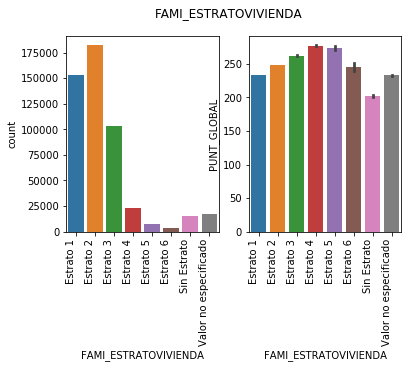

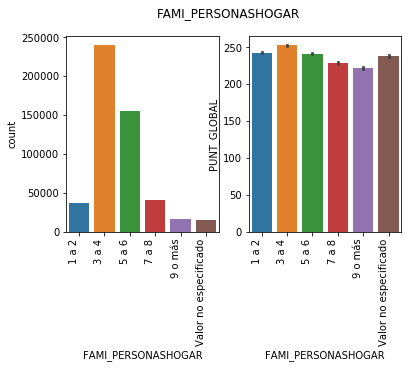

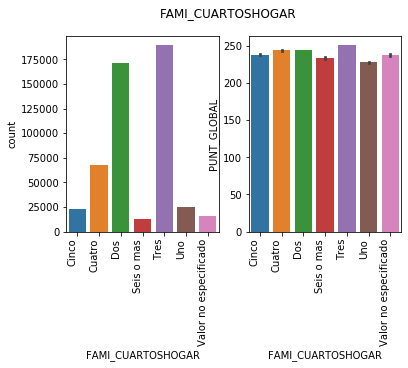

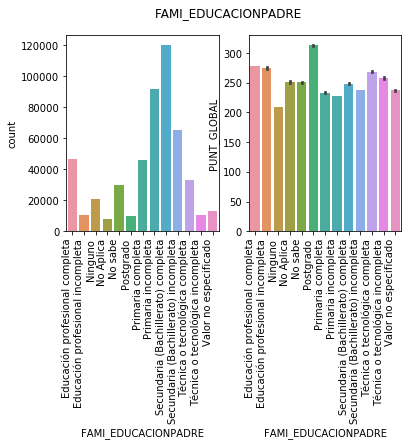

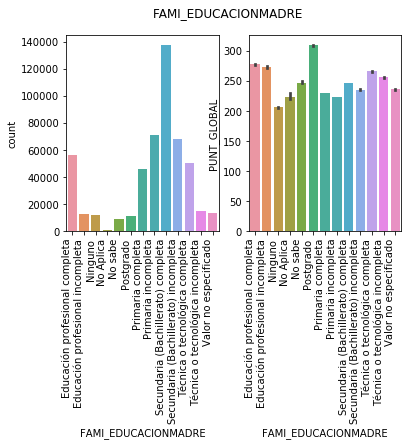

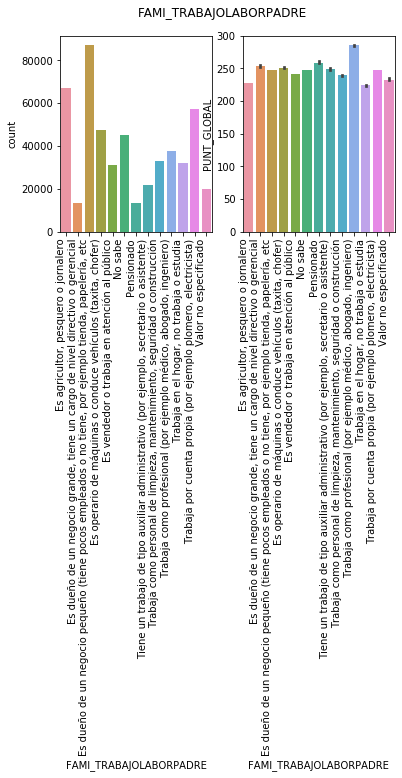

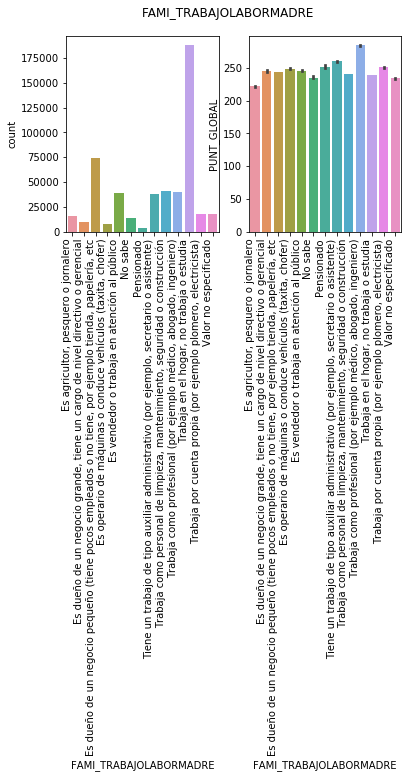

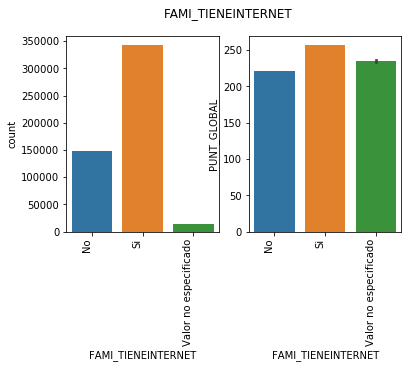

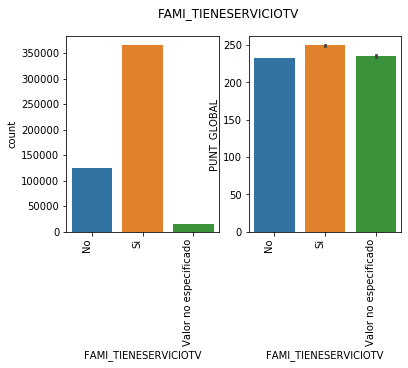

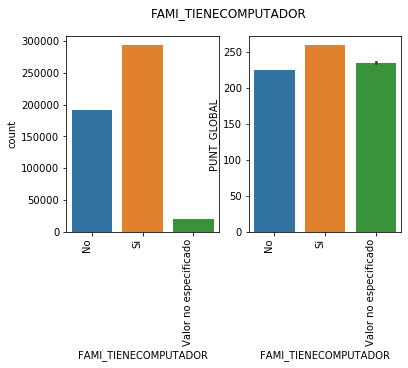

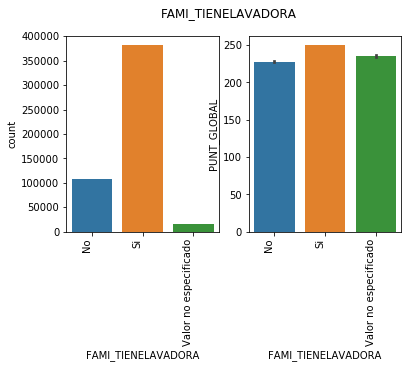

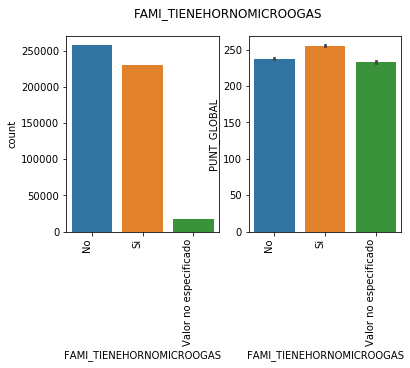

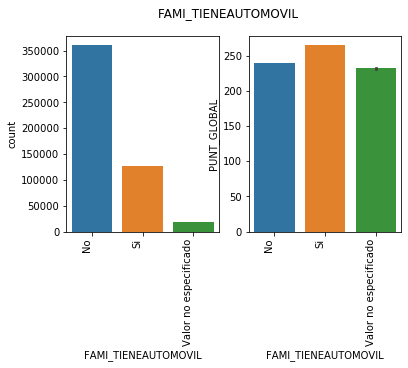

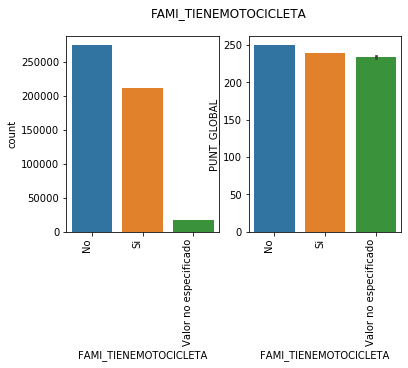

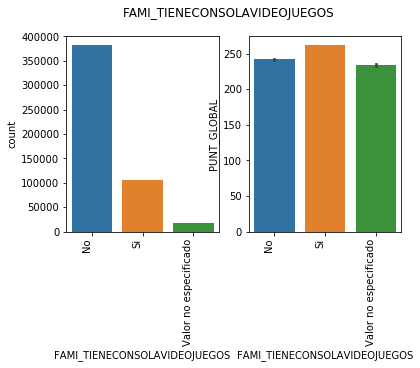

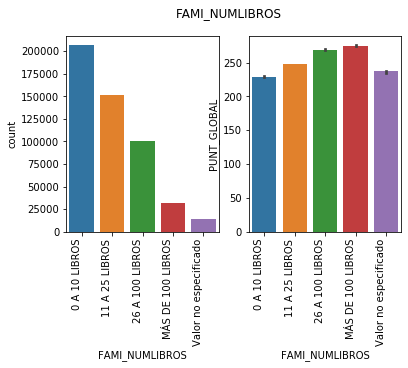

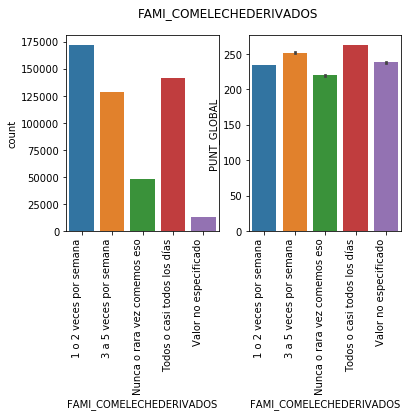

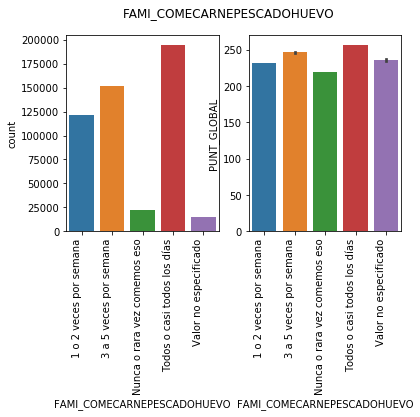

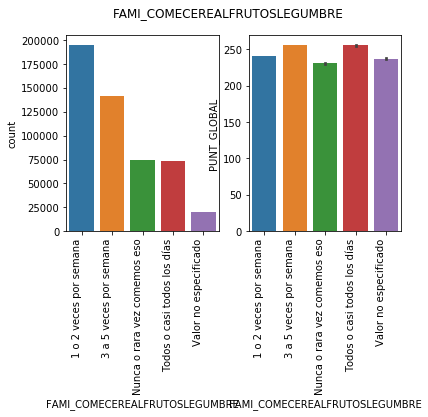

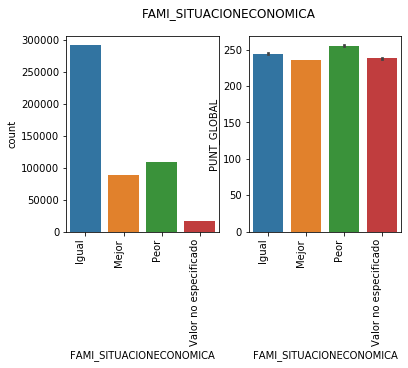

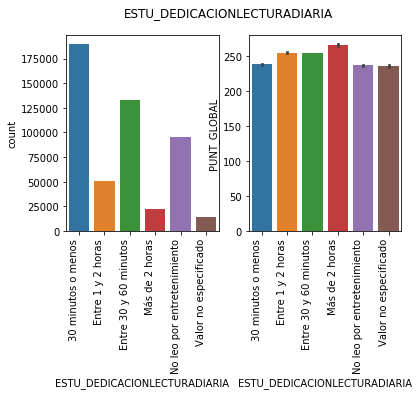

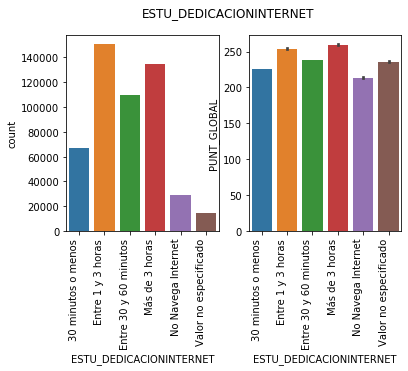

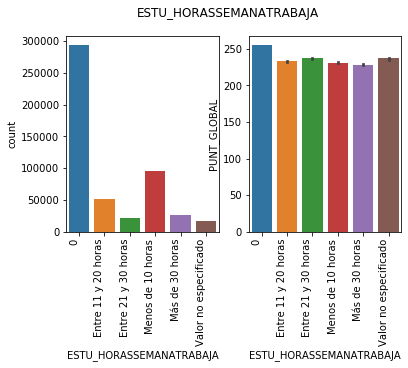

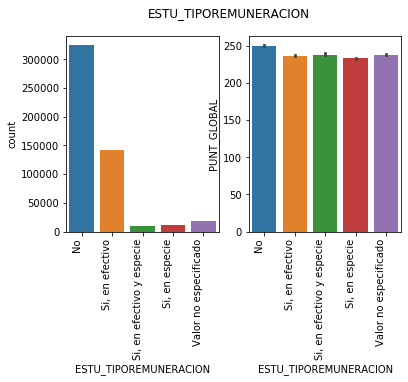

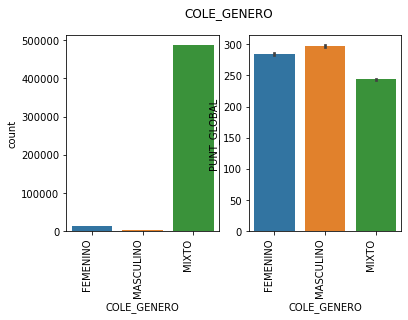

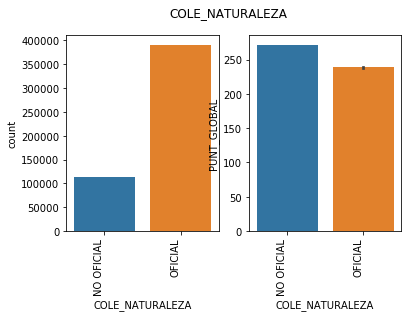

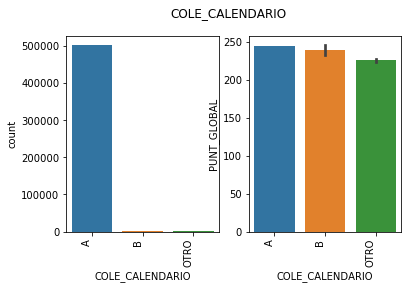

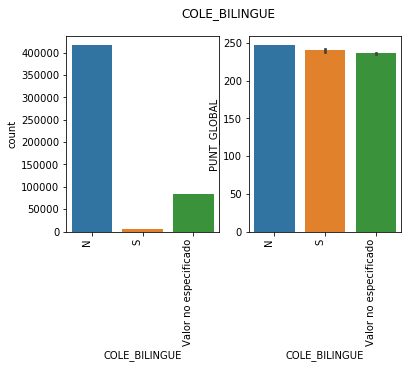

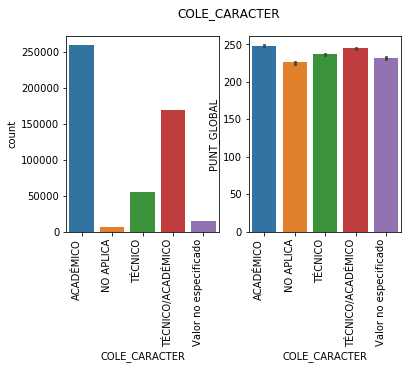

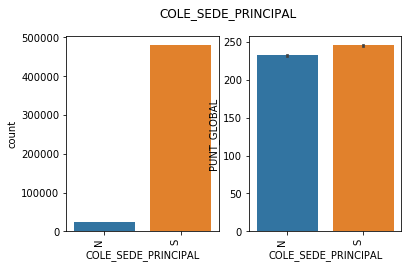

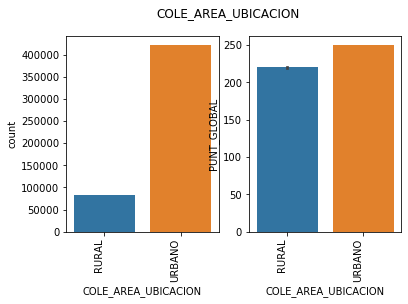

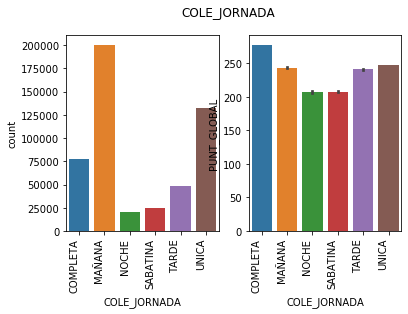

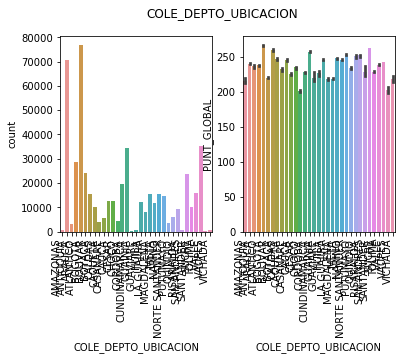

In [17]:
for i in data.columns[:-7]:
    fig, axes = plt.subplots(1, 2)
    fig.suptitle(i)

    sns.countplot(ax=axes[0],
                  data=data, 
                  x=i, 
                  order=sorted(list(data[i].unique())))

    sns.barplot(ax=axes[1], 
                x=i, 
                y="PUNT_GLOBAL", 
                data=data, estimator=np.median,
                order=sorted(list(data[i].unique()))
               )

    fig.autofmt_xdate(rotation=90)

    plt.show()

In [18]:
tmp = data.loc[data.EDAD<70]

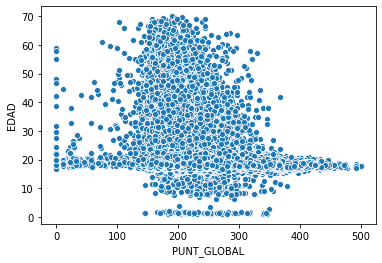

In [19]:
sns.scatterplot(x='PUNT_GLOBAL', y='EDAD', data=tmp)

Para poder hacer el análisis de la incidencia de las variables sobre los resultados, tomamos como proxy la variable resultados globales que tiene alta correlación con todas las variables. Como se puede ver hay varias variables que presentan incidencia:

1. Las variables relacionadas con electrodomésticos y servicios de las casas (si tiene tv, video juegos, internet) muestran que en los casos positivos el puntaje suele subir.
2. Igualmente las zonas donde se presenta el examen presenta incidencia. En los casos rurales el puntaje es menor, así como cierta distribución geográfica con mayores puntajes en ciertas zonas del país.
3. Las variables relacionadas con las ocupaciones y profesiones de los padres también tiene incidencia en los puntajes.
4. Los tiempos dedicados a la lectura y los libros en casa (entre más, mejor), también parecen explicar los resultados del puntaje global.
5. En los casos donde el estudiante trabaja, también tiende a disminuir el puntaje de la prueba.
6. No parece haber una relación clara con la edad.

Aunque hay variables que presentan relaciones, en este caso no seleccionaremos variables y se entrenará un modelo con regularización para poder hacer selección de variables.

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [20]:
# Código
percentil = .75
y = data[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 
          'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']]
X = pd.concat([pd.get_dummies(data.loc[:, data.columns[:-7]], drop_first=True), data[['EDAD']]], axis=1)

for i in y.columns:
    y['DUMMY_'+i] = y[i]<y[i].quantile(.75)
    
y['TOTAL'] = y.iloc[:,-6:-1].sum(axis=1)
y = y['TOTAL'].apply(lambda x: 1 if x>=3 else 0)

/Users/germanpenna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/germanpenna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [22]:
for i in X_train.columns:
    X_train[i] = X_train[i].apply(lambda x: int(x))

/Users/germanpenna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
lr = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [24]:
coefs = pd.DataFrame({'var':X_train.columns, 'import': list(lr.coef_[0])})
coefs['abs_import'] = coefs['import'].apply(lambda x: abs(x))
coefs = coefs.sort_values(by='abs_import', ascending=False)

In [25]:
print(confusion_matrix(y_train, lr.predict(X_train)))
print(classification_report(y_train, lr.predict(X_train)))

[[ 36968  61070]
 [ 18978 286881]]
              precision    recall  f1-score   support

           0       0.66      0.38      0.48     98038
           1       0.82      0.94      0.88    305859

    accuracy                           0.80    403897
   macro avg       0.74      0.66      0.68    403897
weighted avg       0.78      0.80      0.78    403897



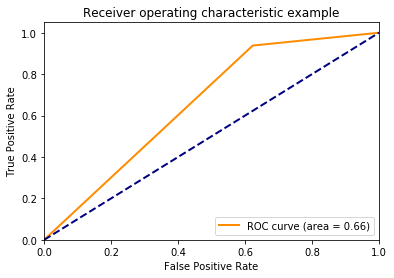

In [26]:
fpr, tpr, _ = roc_curve(y_train, lr.predict(X_train))
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [27]:
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

[[ 9400 15485]
 [ 4680 71410]]
              precision    recall  f1-score   support

           0       0.67      0.38      0.48     24885
           1       0.82      0.94      0.88     76090

    accuracy                           0.80    100975
   macro avg       0.74      0.66      0.68    100975
weighted avg       0.78      0.80      0.78    100975



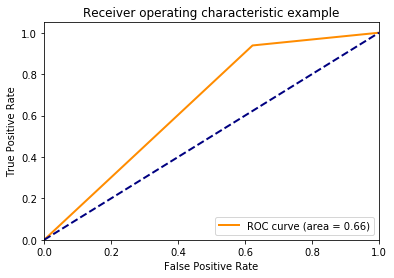

In [28]:
fpr, tpr, _ = roc_curve(y_test, lr.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

Como se puede ver obtenemos un modelo que puede discriminar entre los estudiantes en riesgo y los que no. En el caso de la precisión del modelo es 0,80 tanto en entrenamiento como en validación. La AUC también tiene un valor de 0.66 que es buena para un modelo de este tipo. Veamos ahora las variables que explican a los estudiantes en riesgo. Nótese que los resultados tienen mucho sentido desde el punto de vista del valor de las variables:

- Corresponden a estudiantes en departamentos con problemas como Chocó, La Guajira, Magdalena.
- Estudian en la noche o los sábados.
- Corresponden a padres con bajo nivel de educación.
- Son personas que trabajan

In [29]:
coefs.sort_values(by='import', ascending=False).head(30)

,var,import,abs_import
135,COLE_JORNADA_SABATINA,2.034612,2.034612
134,COLE_JORNADA_NOCHE,1.847131,1.847131
149,COLE_DEPTO_UBICACION_CHOCO,1.191497,1.191497
31,FAMI_EDUCACIONMADRE_Ninguno,0.849940,0.849940
19,FAMI_EDUCACIONPADRE_Ninguno,0.789135,0.789135
5,FAMI_ESTRATOVIVIENDA_Sin Estrato,0.716154,0.716154
155,COLE_DEPTO_UBICACION_LA GUAJIRA,0.670432,0.670432
36,FAMI_EDUCACIONMADRE_Primaria incompleta,0.665491,0.665491
156,COLE_DEPTO_UBICACION_MAGDALENA,0.646540,0.646540
111,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,0.559656,0.559656


Por otra parte, cuando vemos los estudiantes que tienen calificaciones altas, podemos ver características como:

1. Corresponden a regiones que históricamente se han destacado como Santander o Nariño.
2. Corresponden a familias que tienen bastantes libros y dedican tiempo a la lectura.
3. Son hogares con cierta infraestructura (internet, cuartos, etc).
4. Los padres tienen un nivel educativo alto.

In [30]:
coefs.sort_values(by='import', ascending=True).head(30)

,var,import,abs_import
164,COLE_DEPTO_UBICACION_SANTANDER,-0.740192,0.740192
89,FAMI_COMELECHEDERIVADOS_Valor no especificado,-0.724865,0.724865
103,ESTU_DEDICACIONLECTURADIARIA_Más de 2 horas,-0.661540,0.661540
11,FAMI_PERSONASHOGAR_Valor no especificado,-0.645851,0.645851
158,COLE_DEPTO_UBICACION_NARIÑO,-0.605340,0.605340
83,FAMI_NUMLIBROS_26 A 100 LIBROS,-0.549410,0.549410
84,FAMI_NUMLIBROS_MÁS DE 100 LIBROS,-0.544741,0.544741
22,FAMI_EDUCACIONPADRE_Postgrado,-0.518821,0.518821
159,COLE_DEPTO_UBICACION_NORTE SANTANDER,-0.493790,0.493790
154,COLE_DEPTO_UBICACION_HUILA,-0.473365,0.473365


# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [31]:
list(data.COLE_JORNADA.unique())

['COMPLETA', 'UNICA', 'MAÑANA', 'TARDE', 'NOCHE', 'SABATINA']

In [32]:
titulo = '## Exploración ICFES'

seleccion = pn.widgets.RadioButtonGroup(name='Jornada', options=list(data.COLE_JORNADA.unique()), button_type='primary')
seleccion_t = pn.widgets.Select(name='Educación Padre', options= list(data.FAMI_EDUCACIONPADRE.unique()))


In [33]:
# YOUR CODE HERE
@pn.depends(seleccion.param.value, seleccion_t.param.value)

def funcion_interactiva(seleccion, seleccion_t): 

    df = data 
    
    df = df.loc[df['COLE_JORNADA'] == seleccion]
    df = df.loc[df['FAMI_EDUCACIONPADRE'] == seleccion_t]
    
    df = df.groupby('COLE_DEPTO_UBICACION').aggregate({'PUNT_GLOBAL':'mean'})
    df = df.reset_index()
    df.sort_values(by=['PUNT_GLOBAL'], inplace=True, ascending=True)
    
    fig = go.Figure(go.Bar(
                            x=df['PUNT_GLOBAL'],
                            y=df['COLE_DEPTO_UBICACION'],
                            marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                            orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                          )
                   )
    
                    
    fig.update_layout(
                        barmode='stack',                                           # Tipo de barras. En este caso apiliadas.
                        yaxis_title="Departamento",
                        xaxis_title="Promedio puntaje global",
                        title= 'Reporte ICFES',
                        xaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje x.
                        yaxis=dict(showgrid=False),                                # Ocultamos la cuadrícula de eje y.
                        plot_bgcolor='white',                                      # Modificamos el color del fondo del gráfico.
                        showlegend=False,                                          # Ocultamos la leyenda.
                        yaxis_range=[15.5, -.5]                                     # Mostramos los 10 primeros datos.
                     )
    
    return fig

In [34]:
tablero_control = pn.Row(pn.Column(titulo, seleccion, seleccion_t), funcion_interactiva)

Dado que la jornada y la educación del padre son dos variables muy importantes (de acuerdo al modelo), se pone a disposición del usuario un tablero muy sencillo, donde puede usar ambas variables para ver como varía el puntaje global medio

In [35]:
tablero_control.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] RadioButtonGroup(button_type='primary', name='Jornada', options=['COMPLETA', 'UNICA', ...], value='COMPLETA')
        [2] Select(name='Educación Padre', options=['Secundaria (Bachillerato...], value='Secundaria (Bachillerato)...)
    [1] ParamFunction(function)